# Wine Quality Classification based on Attention Model k-Nearest Neighbor Algorithms

## Introduction


This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. - The datasets can be viewed as classification or regression tasks.
This data frame contains the following columns:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality

In this study, we present a practical application where multiple machine learning models are employed to predict wine taste preferences using readily available analytical data from the certification stage. To determine the optimal parameters with minimal computational effort, we use conventional k-NN algorithm. Knowing that k-NN algorithms under-performs under high dimensional environments, the main purpose of this article is to assess attention model based k-NN by comparing accuracy with other existing models. 

Incorporating the "Attention Is All You Need" mechanism into k-NN can enhance its dimension reduction capabilities by focusing on the most important features in the data. By applying self-attention, the model can learn to weigh the relevance of different features and identify which are most crucial for making predictions. This approach reduces the influence of less important dimensions and helps the k-NN algorithm focus on the most relevant aspects of the dataset. Similar to how attention highlights key relationships in natural language processing, in k-NN, it enables the model to perform more efficiently, improving accuracy and reducing computational complexity in high-dimensional spaces.

test git features 

### Procedure
- Data analysis of the dataset "WineQT.csv"
- Feature selection/engineering
- Attention model and training
- PCA and LDA model
- Results and discussion

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import plotly.graph_objects as go
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv('WineQT.csv')


## Data Analysis

In [25]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [27]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [28]:
df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


Graph all data in one diagram just for fun


Unique Quality:  [5 6 7 4 8 3]


<Axes: >

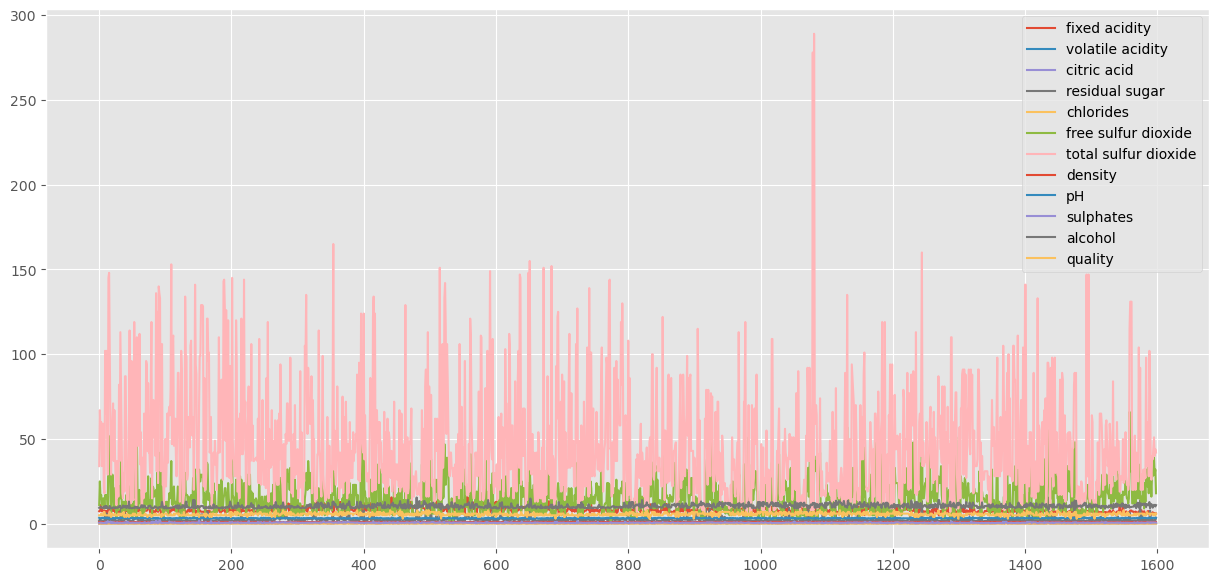

In [29]:
print("Unique Quality: ", df['quality'].unique())
df.plot(figsize=(15, 7))

In [30]:
average_quality = df.groupby('quality').mean()

average_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


<Axes: xlabel='quality'>

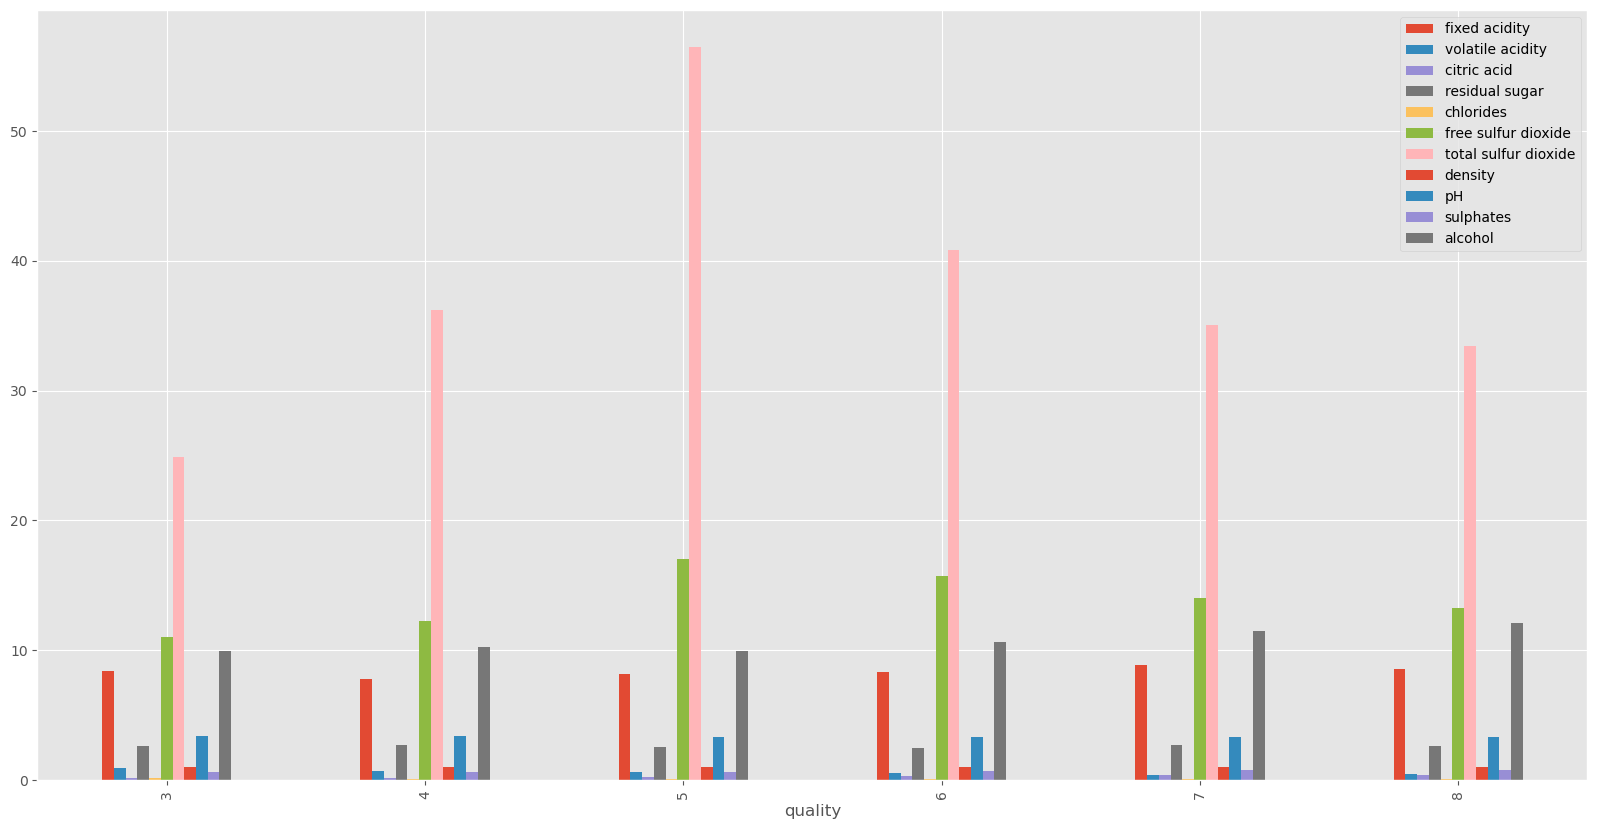

In [31]:
average_quality.plot(kind='bar', figsize=(20, 10))

See effect some of the elements on the quality-details

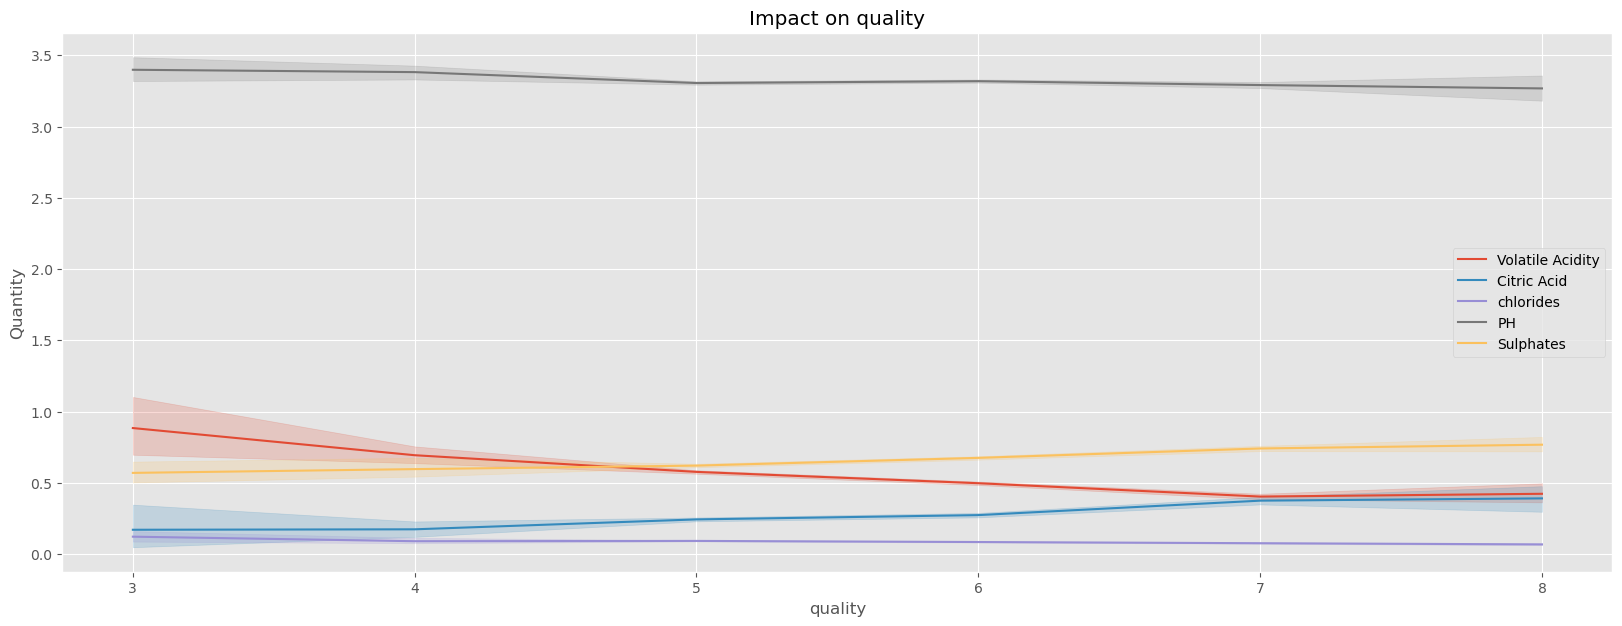

In [32]:


plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=df, x="quality",y="pH",label="PH")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

Alcohol effect on quality

<Axes: xlabel='quality', ylabel='alcohol'>

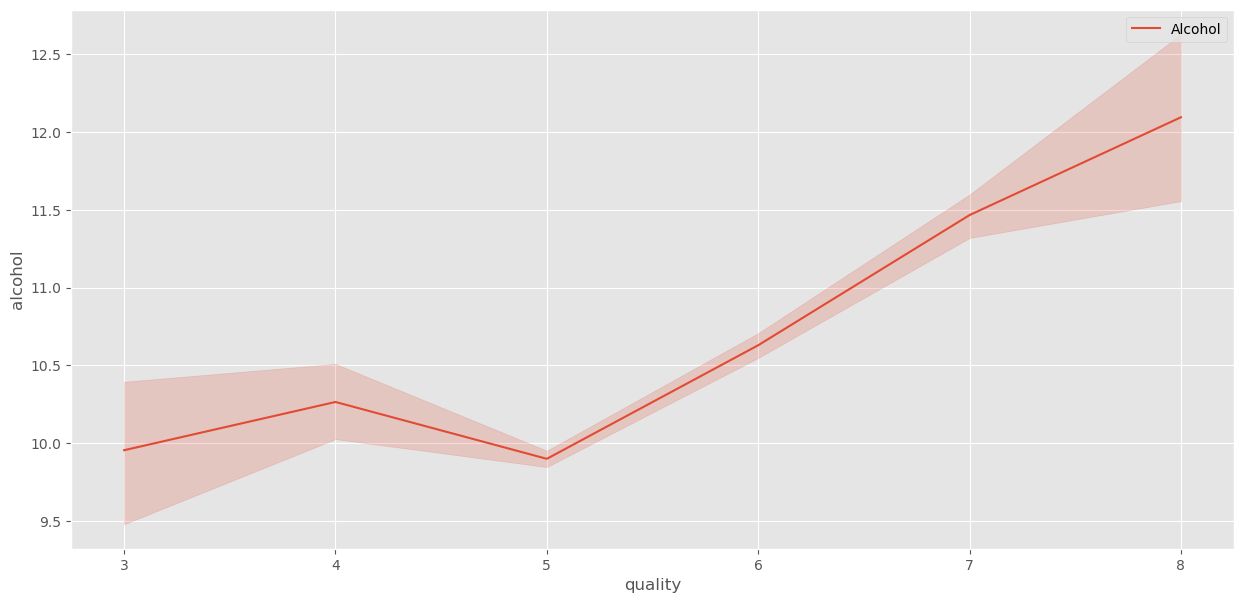

In [33]:


plt.figure(figsize=(15,7)) 
sns.lineplot(data=df, x="quality", y="alcohol", label="Alcohol")

Effect of total sulfur dioxide on quality

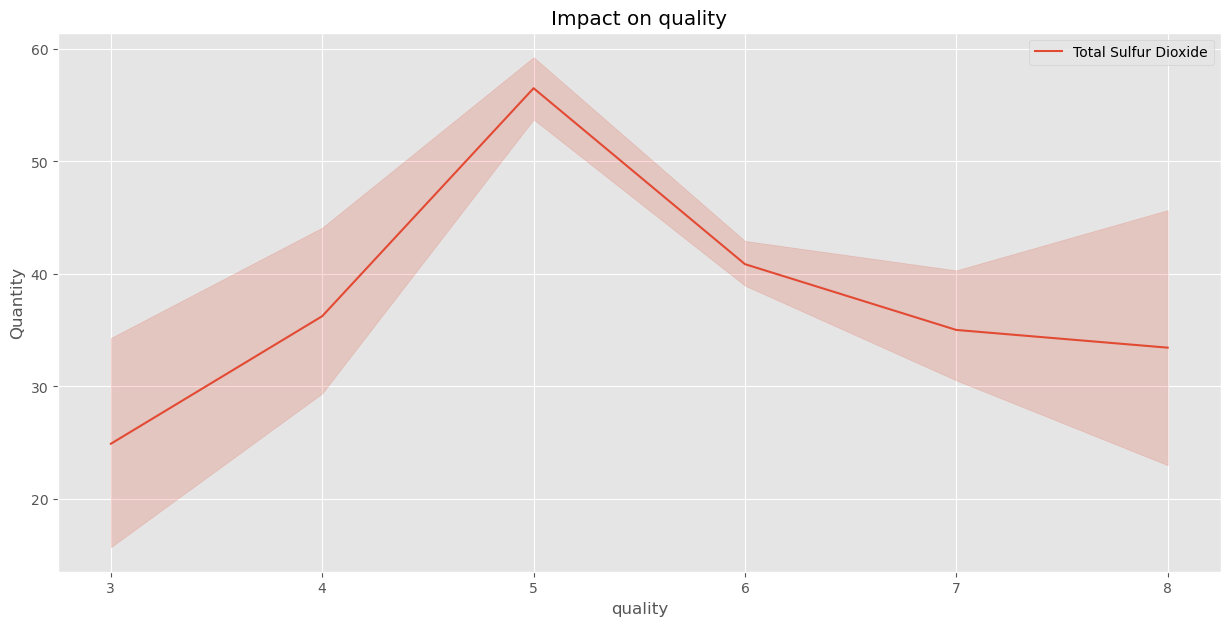

In [34]:


plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality", y="total sulfur dioxide", label="Total Sulfur Dioxide")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()

Effect of free sulfur dioxide on quality

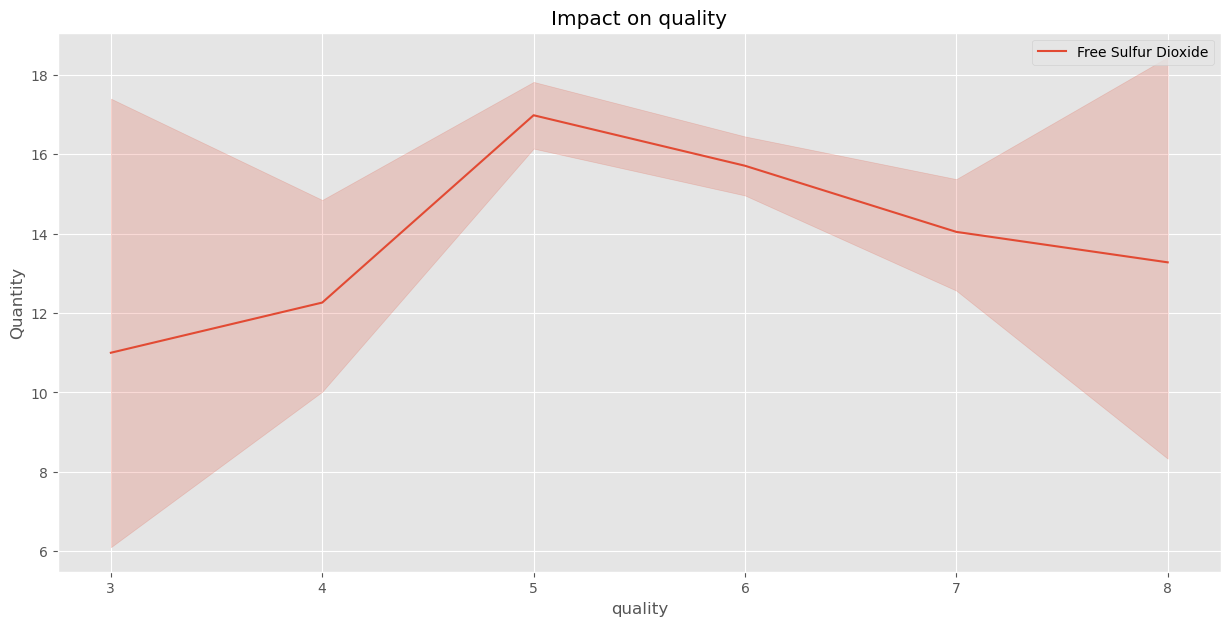

In [35]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality", y="free sulfur dioxide", label="Free Sulfur Dioxide")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()

Using graph interactive the show the effect free and total - sulfur dioxide in the quality

In [36]:
px.scatter(df, x="free sulfur dioxide", y="total sulfur dioxide",animation_frame="quality")

Using graph interactive the show the effect free and total - sulfur dioxide in the quality


In [37]:

px.scatter(df, x="free sulfur dioxide", y="total sulfur dioxide",animation_frame="quality")

## Feature Selection/Engineering

### Principal Component Analysis

<Axes: >

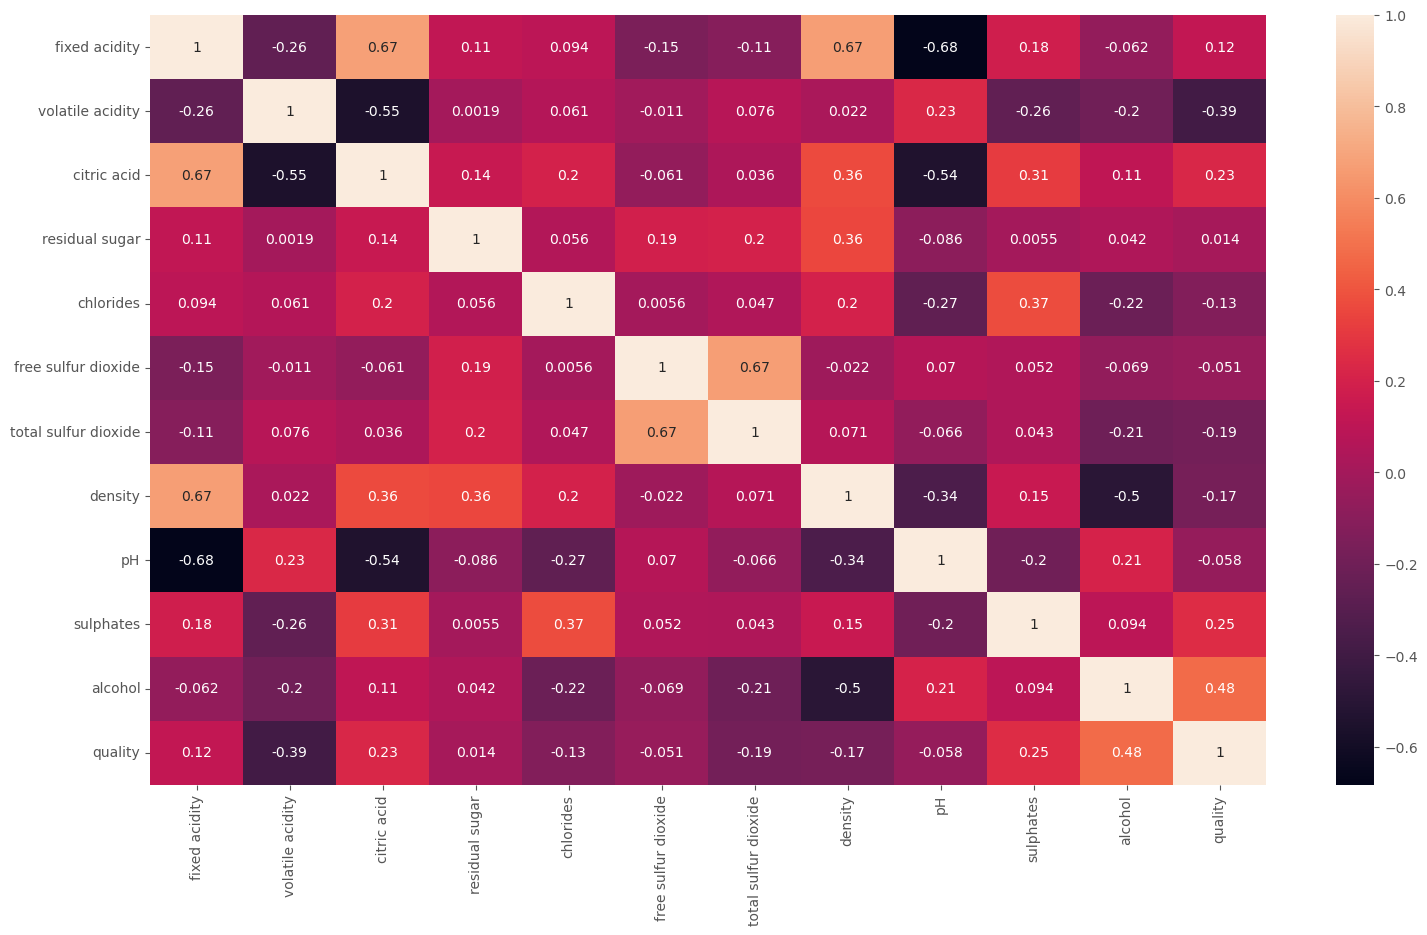

In [38]:
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), annot=True)

From above heatmap of correlation matrix we can interpret that many attributes are showing linear correlation with each other. So, Lets try to reduce redundancy from the data.

Just to make things simple lets predict the attribute 'density' instead of attribute 'quality'

In [39]:
def FE_PCA_linear_regression(x, y):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error

    FE_PCA_x_train, FE_PCA_x_test, FE_PCA_y_train, FE_PCA_y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)
    FE_PCA_lr = LinearRegression()
    FE_PCA_lr.fit(FE_PCA_x_train, FE_PCA_y_train)
    
    FE_PCA_y_pred = FE_PCA_lr.predict(FE_PCA_x_test)
    print(f"Mean Squared Error = {mean_squared_error(FE_PCA_y_test, FE_PCA_y_pred)}")
    
    return FE_PCA_lr

In [40]:
from sklearn.decomposition import PCA

FE_pca = PCA(n_components = 8)

x_FE_PCA = df.drop("density", axis = 1)
y_FE_PCA = df['density']

x_pca = FE_pca.fit_transform(x_FE_PCA)

pc = FE_PCA_linear_regression(x_pca, y_FE_PCA.values.reshape(-1, 1))

Mean Squared Error = 8.428507189962027e-07


### Kernel Principal Component Analysis

Principal component analysis is an effective dimension reduction technique when attributes are linearly correlated and when the resulting scores are associated with the outcome. Consider the following equation:

$ y = x_1 + x_2^2 + x_1^2 + x_2 + noise $

Suppose also that the correlation between x1 and x2 is strong. Applying traditional PCA to this example would summarize the relationship between x1 and x2 into one principal component. However this approach would ignore the important quadratic relationships that would be critically necessary for predicting the outcome.

Therefore traditional PCA will be a much less effective dimension reduction technique when the data should be augmented with additional features.

In [41]:
from sklearn.decomposition import KernelPCA

FE_Kernel_pca = KernelPCA(n_components = 8, kernel = 'rbf')

x_FE_Kernel_PCA = df.drop("density", axis = 1)
y_FE_Kernel_PCA = df['density']

x_pca = FE_Kernel_pca.fit_transform(x_FE_Kernel_PCA)

pc = FE_PCA_linear_regression(x_pca, y_FE_Kernel_PCA.values.reshape(-1, 1))

Mean Squared Error = 3.243931551945926e-06


## Various Models and Accuracy Comparison

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#for ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Data preprocessing

In [43]:
for col in ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']:
    df[col]=df[col]/df[col].max()

Data split

In [44]:
feature=np.array(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
label=np.array(df['quality'])

xtrain,xtest,ytrain,ytest=train_test_split(feature,label,test_size=0.2,random_state=0)

In [45]:
model_comp={}

### Logistic Regression

In [46]:
lgr=LogisticRegression()
lgr.fit(xtrain,ytrain)
y1=lgr.predict(xtest)
print(accuracy_score(ytest,y1))
print(f1_score(ytest,y1,average='weighted'))
print(classification_report(ytest,y1))

model_comp['logistic regression']=[accuracy_score(y1,ytest),f1_score(ytest,y1,average='weighted')]

0.625
0.5931778739355794
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.65      0.77      0.70       135
           6       0.62      0.65      0.64       142
           7       0.33      0.11      0.17        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.27      0.26      0.25       320
weighted avg       0.58      0.62      0.59       320



### Decision Tree

In [47]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
y2=dt.predict(xtest)

print(accuracy_score(ytest,y2))
print(f1_score(ytest,y2,average='weighted'))
print(classification_report(ytest,y2))

model_comp['decision tree']=[accuracy_score(y2,ytest),f1_score(ytest,y2,average='weighted')]

0.6625
0.666006540179881
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.36      0.36      0.36        11
           5       0.73      0.71      0.72       135
           6       0.70      0.66      0.68       142
           7       0.47      0.67      0.55        27
           8       0.00      0.00      0.00         3

    accuracy                           0.66       320
   macro avg       0.38      0.40      0.39       320
weighted avg       0.67      0.66      0.67       320



### Random Forest

In [48]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
y3=rf.predict(xtest)

print(accuracy_score(ytest,y3))
print(f1_score(ytest,y3,average='weighted'))
print(classification_report(ytest,y3))


model_comp['Random forest']=[accuracy_score(y3,ytest),f1_score(ytest,y3,average='weighted')]

0.71875
0.7010195254572418
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.80      0.77       135
           6       0.71      0.74      0.73       142
           7       0.63      0.63      0.63        27
           8       0.00      0.00      0.00         3

    accuracy                           0.72       320
   macro avg       0.35      0.36      0.35       320
weighted avg       0.68      0.72      0.70       320



### k-NN

In [49]:
k=KNeighborsClassifier()
k.fit(xtrain,ytrain)
y4=k.predict(xtest)

print(accuracy_score(ytest,y4))
print(f1_score(ytest,y4,average='weighted'))
print(classification_report(ytest,y4))

model_comp['KNN']=[accuracy_score(y4,ytest),f1_score(ytest,y4,average='weighted')]

0.625
0.6101330372686371
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.74      0.70       135
           6       0.63      0.62      0.63       142
           7       0.46      0.44      0.45        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.29      0.30      0.30       320
weighted avg       0.60      0.62      0.61       320



### SVC

In [50]:
s=SVC()
s.fit(xtrain,ytrain)
y5=s.predict(xtest)

print(accuracy_score(ytest,y5))
print(f1_score(ytest,y5,average='weighted'))
print(classification_report(ytest,y5))

model_comp['svc']=[accuracy_score(y5,ytest),f1_score(ytest,y5,average='weighted')]

0.65
0.6024744814931203
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.67      0.81      0.73       135
           6       0.63      0.70      0.66       142
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         3

    accuracy                           0.65       320
   macro avg       0.22      0.25      0.23       320
weighted avg       0.56      0.65      0.60       320



### Model Comparison

In [51]:
df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['Accuracy','F1_score']
df1=df1.sort_values('F1_score',ascending=True)
df1.style.background_gradient(cmap='Greens')

,Accuracy,F1_score
logistic regression,0.625000,0.593178
svc,0.650000,0.602474
KNN,0.625000,0.610133
decision tree,0.662500,0.666007
Random forest,0.718750,0.701020


## Attention Mechanism and k-NN Algorithm

### Procedure:

- Preprocess the dataset by normalizing and standardizing the features(feature engineering)
- Split the dataset into training and testing sets
- Implement the k-NN algorithm with atttention mechanism
- Train th emodel using the training set
- Evaluate the model's performance using the testing set

The majority of the first step have already been discussed in the feature engineering section. We may repeat the steps and integrade them into the code. 


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load and preprocess the dataset
df = pd.read_csv('WineQT.csv')
X = df.drop('quality', axis=1)
y = df['quality']
y = (y >= 6).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_train_tensor = torch.LongTensor(y_train.values).to(device)
y_test_tensor = torch.LongTensor(y_test.values).to(device)

class AttentionFeatureExtractor(nn.Module):
    def __init__(self, input_dim, attention_dim):
        super(AttentionFeatureExtractor, self).__init__()
        self.attention = nn.Linear(input_dim, attention_dim)
        self.context = nn.Linear(attention_dim, 1, bias=False)
        
    def forward(self, x):
        attention_weights = F.relu(self.attention(x))  # Using ReLU instead of tanh
        attention_weights = self.context(attention_weights)
        attention_weights = F.softmax(attention_weights, dim=1)
        weighted_features = x * attention_weights
        return weighted_features, attention_weights

class ImprovedAttentionModel(nn.Module):
    def __init__(self, input_dim, attention_dim, hidden_dim, num_classes, dropout_rate=0.5):
        super(ImprovedAttentionModel, self).__init__()
        self.feature_extractor = AttentionFeatureExtractor(input_dim, attention_dim)
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(dropout_rate)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)
        
    def forward(self, x):
        weighted_features, attention_weights = self.feature_extractor(x)
        x = self.dropout(F.relu(self.bn1(self.fc1(weighted_features))))
        x = self.dropout(F.relu(self.bn2(self.fc2(x))))
        output = self.fc3(x)
        return output, weighted_features, attention_weights

def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=100):
    for epoch in range(num_epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs, _, _ = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
        
        scheduler.step(loss)
        
        if (epoch + 1) % 10 == 0:
            model.eval()
            with torch.no_grad():
                test_outputs, _, _ = model(X_test_tensor)
                _, predicted = torch.max(test_outputs.data, 1)
                accuracy = accuracy_score(y_test_tensor.cpu(), predicted.cpu())
                print(f'Epoch [{epoch+1}/{num_epochs}], Test Accuracy: {accuracy:.4f}')

    return model

input_dim = X_train_scaled.shape[1]
attention_dim = 64
hidden_dim = 128
num_classes = 2
dropout_rate = 0.5
learning_rate = 0.001
batch_size = 64
num_epochs = 200

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_scaled)):
    print(f"Fold {fold + 1}")
    
    X_train_fold = X_train_tensor[train_idx]
    y_train_fold = y_train_tensor[train_idx]
    X_val_fold = X_train_tensor[val_idx]
    y_val_fold = y_train_tensor[val_idx]
    
    model = ImprovedAttentionModel(input_dim, attention_dim, hidden_dim, num_classes, dropout_rate).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    scheduler = ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.5, verbose=True)
    
    train_dataset = TensorDataset(X_train_fold, y_train_fold)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    model = train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs)
    
    model.eval()
    with torch.no_grad():
        val_outputs, _, _ = model(X_val_fold)
        _, predicted = torch.max(val_outputs.data, 1)
        accuracy = accuracy_score(y_val_fold.cpu(), predicted.cpu())
        cv_scores.append(accuracy)
        print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}")

print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Train the final model on the entire training set
final_model = ImprovedAttentionModel(input_dim, attention_dim, hidden_dim, num_classes, dropout_rate).to(device)
final_criterion = nn.CrossEntropyLoss()
final_optimizer = optim.Adam(final_model.parameters(), lr=learning_rate, weight_decay=1e-5)
final_scheduler = ReduceLROnPlateau(final_optimizer, 'min', patience=10, factor=0.5, verbose=True)

final_train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
final_train_loader = DataLoader(final_train_dataset, batch_size=batch_size, shuffle=True)

final_model = train_model(final_model, final_train_loader, final_criterion, final_optimizer, final_scheduler, num_epochs)

# Extract attention-weighted features
final_model.eval()
with torch.no_grad():
    _, train_features, _ = final_model(X_train_tensor)
    _, test_features, _ = final_model(X_test_tensor)

train_features = train_features.cpu().numpy()
test_features = test_features.cpu().numpy()

# Apply KNN on attention-weighted features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_features, y_train)
knn_predictions = knn.predict(test_features)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f"KNN Accuracy on attention-weighted features: {knn_accuracy:.4f}")

# Create an ensemble of the neural network and KNN
nn_predictions = final_model(X_test_tensor)[0].argmax(dim=1).cpu().numpy()
ensemble_predictions = np.round((nn_predictions + knn_predictions) / 2).astype(int)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")

Using device: cuda
Fold 1


c:\Users\Thoma\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/200], Test Accuracy: 0.7438
Epoch [20/200], Test Accuracy: 0.7469
Epoch [30/200], Test Accuracy: 0.7406
Epoch [40/200], Test Accuracy: 0.7375
Epoch [50/200], Test Accuracy: 0.7375
Epoch [60/200], Test Accuracy: 0.7406
Epoch [70/200], Test Accuracy: 0.7375
Epoch [80/200], Test Accuracy: 0.7438
Epoch [90/200], Test Accuracy: 0.7406
Epoch [100/200], Test Accuracy: 0.7438
Epoch [110/200], Test Accuracy: 0.7469
Epoch [120/200], Test Accuracy: 0.7438
Epoch [130/200], Test Accuracy: 0.7438
Epoch [140/200], Test Accuracy: 0.7469
Epoch [150/200], Test Accuracy: 0.7438
Epoch [160/200], Test Accuracy: 0.7500
Epoch [170/200], Test Accuracy: 0.7406
Epoch [180/200], Test Accuracy: 0.7469
Epoch [190/200], Test Accuracy: 0.7438
Epoch [200/200], Test Accuracy: 0.7438
Fold 1 Accuracy: 0.7852
Fold 2


c:\Users\Thoma\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/200], Test Accuracy: 0.7531
Epoch [20/200], Test Accuracy: 0.7312
Epoch [30/200], Test Accuracy: 0.7500
Epoch [40/200], Test Accuracy: 0.7500
Epoch [50/200], Test Accuracy: 0.7500
Epoch [60/200], Test Accuracy: 0.7500
Epoch [70/200], Test Accuracy: 0.7531
Epoch [80/200], Test Accuracy: 0.7500
Epoch [90/200], Test Accuracy: 0.7500
Epoch [100/200], Test Accuracy: 0.7531
Epoch [110/200], Test Accuracy: 0.7531
Epoch [120/200], Test Accuracy: 0.7531
Epoch [130/200], Test Accuracy: 0.7531
Epoch [140/200], Test Accuracy: 0.7531
Epoch [150/200], Test Accuracy: 0.7500
Epoch [160/200], Test Accuracy: 0.7500
Epoch [170/200], Test Accuracy: 0.7531
Epoch [180/200], Test Accuracy: 0.7500
Epoch [190/200], Test Accuracy: 0.7531
Epoch [200/200], Test Accuracy: 0.7500
Fold 2 Accuracy: 0.7773
Fold 3


c:\Users\Thoma\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/200], Test Accuracy: 0.7406
Epoch [20/200], Test Accuracy: 0.7406
Epoch [30/200], Test Accuracy: 0.7469
Epoch [40/200], Test Accuracy: 0.7469
Epoch [50/200], Test Accuracy: 0.7438
Epoch [60/200], Test Accuracy: 0.7406
Epoch [70/200], Test Accuracy: 0.7469
Epoch [80/200], Test Accuracy: 0.7406
Epoch [90/200], Test Accuracy: 0.7406
Epoch [100/200], Test Accuracy: 0.7438
Epoch [110/200], Test Accuracy: 0.7406
Epoch [120/200], Test Accuracy: 0.7406
Epoch [130/200], Test Accuracy: 0.7406
Epoch [140/200], Test Accuracy: 0.7406
Epoch [150/200], Test Accuracy: 0.7406
Epoch [160/200], Test Accuracy: 0.7469
Epoch [170/200], Test Accuracy: 0.7469
Epoch [180/200], Test Accuracy: 0.7438
Epoch [190/200], Test Accuracy: 0.7406
Epoch [200/200], Test Accuracy: 0.7406
Fold 3 Accuracy: 0.7578
Fold 4


c:\Users\Thoma\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/200], Test Accuracy: 0.7438
Epoch [20/200], Test Accuracy: 0.7438
Epoch [30/200], Test Accuracy: 0.7500
Epoch [40/200], Test Accuracy: 0.7438
Epoch [50/200], Test Accuracy: 0.7469
Epoch [60/200], Test Accuracy: 0.7469
Epoch [70/200], Test Accuracy: 0.7469
Epoch [80/200], Test Accuracy: 0.7438
Epoch [90/200], Test Accuracy: 0.7469
Epoch [100/200], Test Accuracy: 0.7500
Epoch [110/200], Test Accuracy: 0.7406
Epoch [120/200], Test Accuracy: 0.7500
Epoch [130/200], Test Accuracy: 0.7469
Epoch [140/200], Test Accuracy: 0.7469
Epoch [150/200], Test Accuracy: 0.7469
Epoch [160/200], Test Accuracy: 0.7469
Epoch [170/200], Test Accuracy: 0.7469
Epoch [180/200], Test Accuracy: 0.7438
Epoch [190/200], Test Accuracy: 0.7438
Epoch [200/200], Test Accuracy: 0.7438
Fold 4 Accuracy: 0.7891
Fold 5


c:\Users\Thoma\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/200], Test Accuracy: 0.7438
Epoch [20/200], Test Accuracy: 0.7469
Epoch [30/200], Test Accuracy: 0.7531
Epoch [40/200], Test Accuracy: 0.7500
Epoch [50/200], Test Accuracy: 0.7531
Epoch [60/200], Test Accuracy: 0.7500
Epoch [70/200], Test Accuracy: 0.7500
Epoch [80/200], Test Accuracy: 0.7500
Epoch [90/200], Test Accuracy: 0.7531
Epoch [100/200], Test Accuracy: 0.7500
Epoch [110/200], Test Accuracy: 0.7500
Epoch [120/200], Test Accuracy: 0.7531
Epoch [130/200], Test Accuracy: 0.7469
Epoch [140/200], Test Accuracy: 0.7531
Epoch [150/200], Test Accuracy: 0.7531
Epoch [160/200], Test Accuracy: 0.7531
Epoch [170/200], Test Accuracy: 0.7562
Epoch [180/200], Test Accuracy: 0.7500
Epoch [190/200], Test Accuracy: 0.7531
Epoch [200/200], Test Accuracy: 0.7531
Fold 5 Accuracy: 0.7059
Mean CV Accuracy: 0.7631 (+/- 0.0305)


c:\Users\Thoma\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [10/200], Test Accuracy: 0.7531
Epoch [20/200], Test Accuracy: 0.7594
Epoch [30/200], Test Accuracy: 0.7531
Epoch [40/200], Test Accuracy: 0.7500
Epoch [50/200], Test Accuracy: 0.7562
Epoch [60/200], Test Accuracy: 0.7562
Epoch [70/200], Test Accuracy: 0.7500
Epoch [80/200], Test Accuracy: 0.7500
Epoch [90/200], Test Accuracy: 0.7500
Epoch [100/200], Test Accuracy: 0.7500
Epoch [110/200], Test Accuracy: 0.7531
Epoch [120/200], Test Accuracy: 0.7562
Epoch [130/200], Test Accuracy: 0.7531
Epoch [140/200], Test Accuracy: 0.7562
Epoch [150/200], Test Accuracy: 0.7562
Epoch [160/200], Test Accuracy: 0.7500
Epoch [170/200], Test Accuracy: 0.7562
Epoch [180/200], Test Accuracy: 0.7531
Epoch [190/200], Test Accuracy: 0.7594
Epoch [200/200], Test Accuracy: 0.7531
KNN Accuracy on attention-weighted features: 0.7063
Ensemble Accuracy: 0.7406


### Detailed Explanation of AttentionFeatureExtractor and ImprovedAttentionModel

#### AttentionFeatureExtractor

This class implements an attention mechanism, allowing the model to focus on different parts of the input with varying intensity.

##### 1. Architecture
```python
class AttentionFeatureExtractor(nn.Module):
    def __init__(self, input_dim, attention_dim):
        super(AttentionFeatureExtractor, self).__init__()
        self.attention = nn.Linear(input_dim, attention_dim)
        self.context = nn.Linear(attention_dim, 1, bias=False)

```
- It takes two parameters: `input_dim` (the number of input features) and `attention_dim` (the dimension of the attention space).
- It uses two linear layers (`attention` and `context`) to calculate the attention weights and context vectors, respectively.

##### 2. Forward pass
```python
def forward(self, x):
    attention_weights = F.relu(self.attention(x))
    attention_weights = self.context(attention_weights)
    attention_weights = F.softmax(attention_weights, dim=1)
    weighted_features = x * attention_weights
    return weighted_features, attention_weights
```
- Applies ReLU activation after the first linear layer. This introduces non-linearity and allows for more complex attention patterns.
- The context layer reduces the dimension to 1, creating a scalar attention weight for each feature.
- Softmax is applied to normalize the attention weights, ensuring they sum to 1 across features.
- Input features are multiplied element-wise with the attention weights, emphasizing important features.

##### 3. Key Aspects

- The attention mechanism allows the model to learn which features are most important for the task.
- By using ReLU instead of tanh (a common choice in attention mechanisms), it allows for sparser attention patterns.
- The softmax ensures a probabilistic interpretation of feature importance.

#### ImprovedAttentionModel
This class defines the main model architecture, incorporating the attention mechanism:

##### 1. Architecture
```python
class ImprovedAttentionModel(nn.Module):
    def __init__(self, input_dim, attention_dim, hidden_dim, num_classes, dropout_rate=0.5):
        super(ImprovedAttentionModel, self).__init__()
        self.feature_extractor = AttentionFeatureExtractor(input_dim, attention_dim)
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(dropout_rate)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)
```

- It takes five parameters: `input_dim` (the number of input features), `attention_dim` (the dimension of the attention space), `hidden_dim` (the dimension of the hidden layers), `num_classes` (the number of output classes), and `dropout_rate` (optional, default 0.5).
- It uses the `AttentionFeatureExtractor` to extract attention-weighted features.
- It uses three fully connected layers (`fc1`, `fc2`, and `fc3`) with batch normalization (`bn1` and `bn2`) and dropout (`dropout`) for regularization.
- Includes dropout for regularization. Uses batch normalization (bn1, bn2) to stabilize learning.

##### 2. Forward pass

```python
def forward(self, x):
    weighted_features, attention_weights = self.feature_extractor(x)
    x = self.dropout(F.relu(self.bn1(self.fc1(weighted_features))))
    x = self.dropout(F.relu(self.bn2(self.fc2(x))))
    output = self.fc3(x)
    return output, weighted_features, attention_weights
```

- Applies dropout after each fully connected layer and batch normalization before the next layer.
- Passes the weighted features through three fully connected layers.
- Returns three items: the final output (class predictions), the weighted features, and the attention weights

##### 3. Key Aspects
- The use of attention allows the model to focus on the most relevant features.
- The multi-layer architecture enables the model to learn complex, non-linear relationships in the data.
- Dropout helps prevent overfitting by randomly zeroing some neurons during training.
- Batch normalization normalizes the outputs of each layer, which can speed up training and provide some regularization.
- By returning weighted features and attention weights, the model allows for interpretability – you can analyze which features the model considers most important.

#### Training and Evaluation

In [3]:
import pandas as pd
from sklearn.metrics import f1_score
import numpy as np

# Calculate F1 scores
knn_f1 = f1_score(y_test, knn_predictions)
nn_f1 = f1_score(y_test, nn_predictions)
ensemble_f1 = f1_score(y_test, ensemble_predictions)

# Create a dictionary with the results
model_comp = {
    'KNN': [knn_accuracy, knn_f1],
    'Neural Network': [accuracy_score(y_test, nn_predictions), nn_f1],
    'Ensemble': [ensemble_accuracy, ensemble_f1]
}

# Create a DataFrame from the dictionary
df1 = pd.DataFrame.from_dict(model_comp).T
df1.columns = ['Accuracy', 'F1_score']

# Sort the DataFrame by F1 score
df1 = df1.sort_values('F1_score', ascending=True)

# Apply styling with a green color gradient
styled_df = df1.style.background_gradient(cmap='Greens')

# Format the values to display 4 decimal places
styled_df = styled_df.format({
    'Accuracy': '{:.4f}',
    'F1_score': '{:.4f}'
})

# Display the styled DataFrame
display(styled_df)

,Accuracy,F1_score
KNN,0.7063,0.7473
Ensemble,0.7406,0.7477
Neural Network,0.7531,0.7723


Number of columns in X: 11
Length of feature_importances: 1


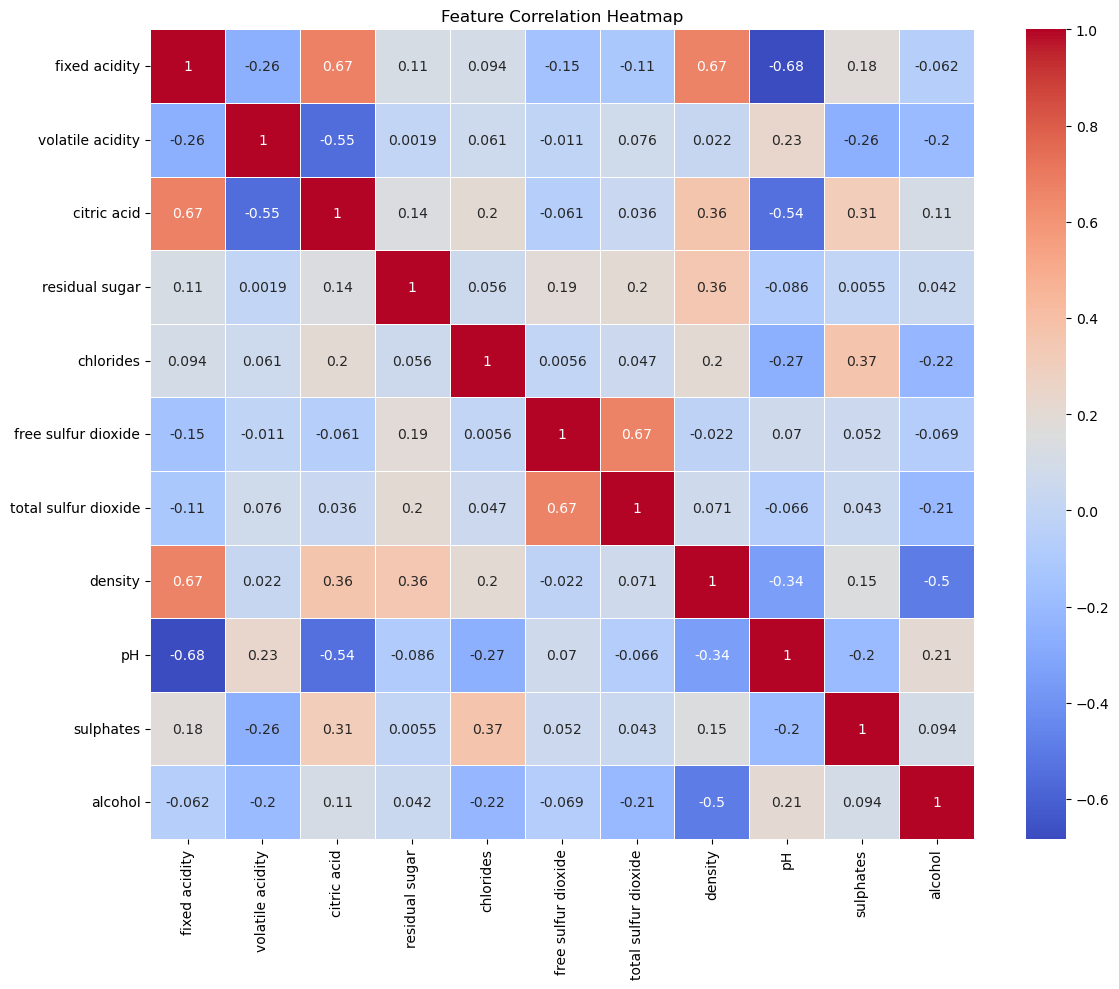

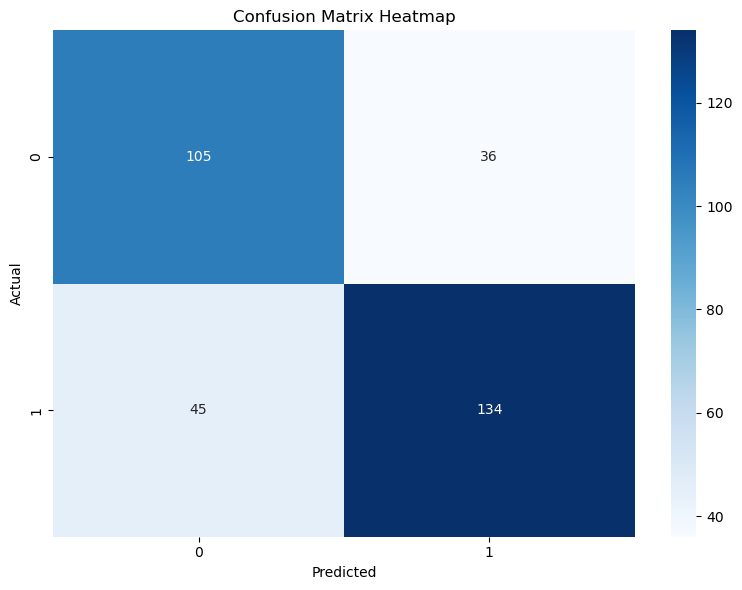

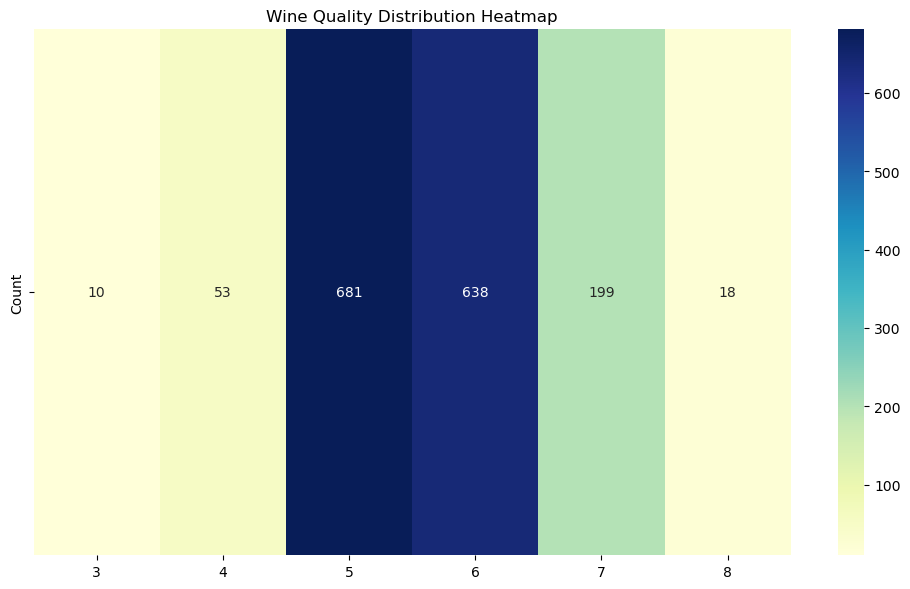

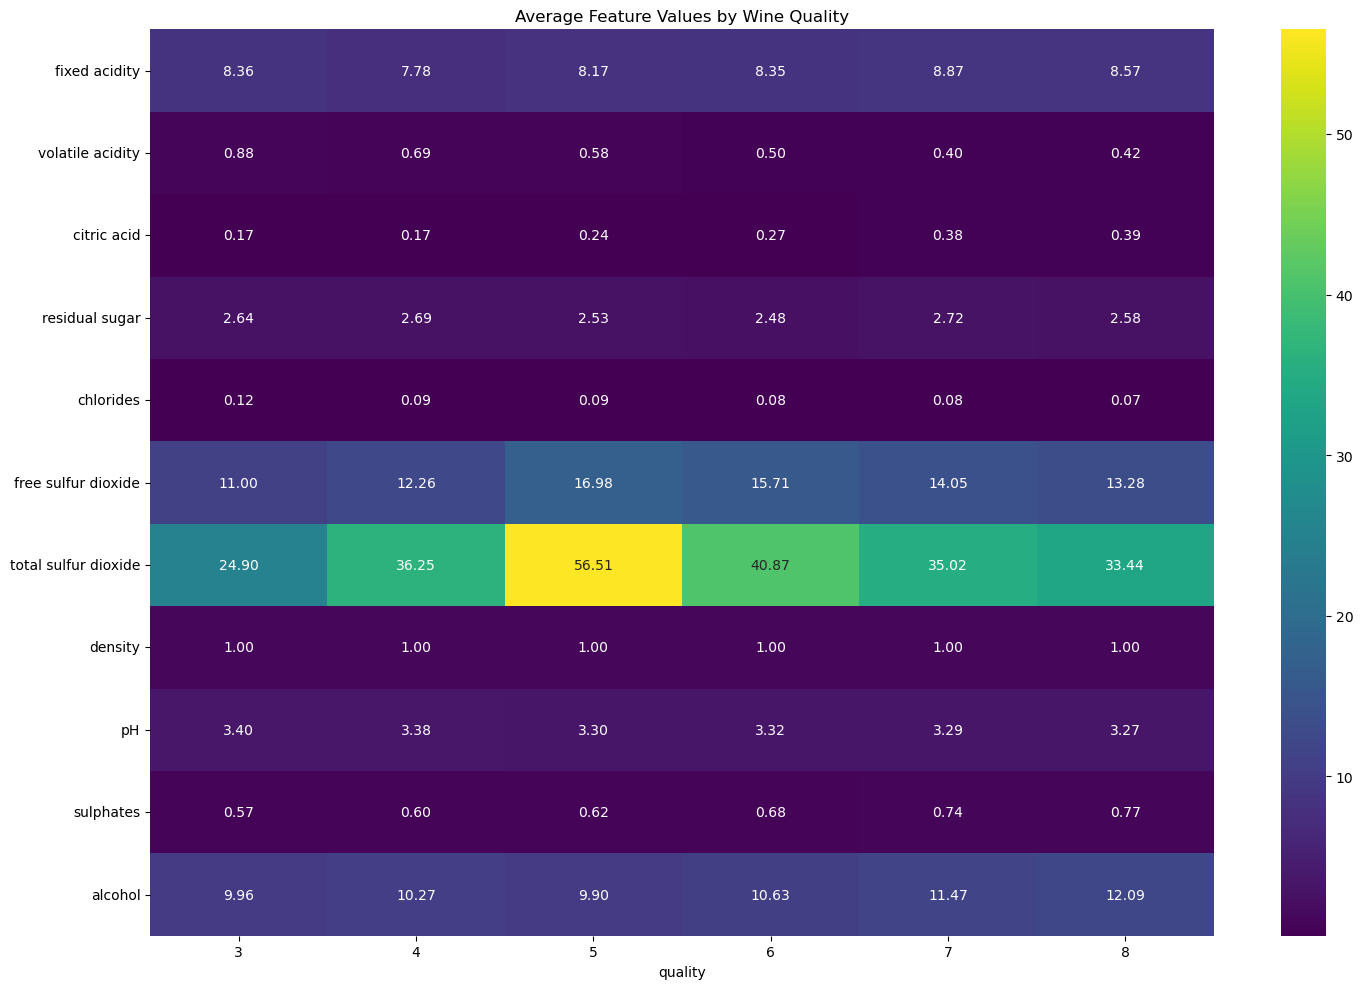

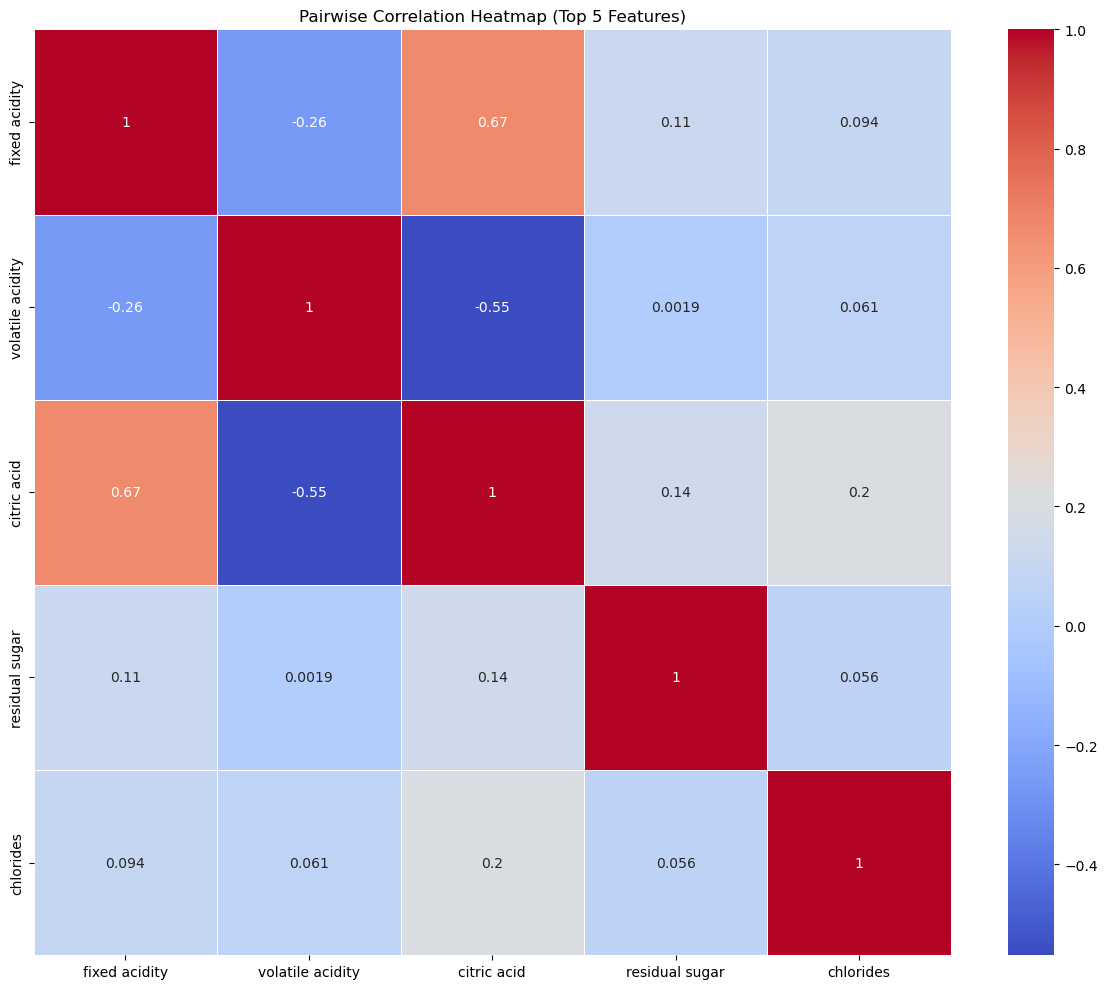

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Ensure we're working with numpy arrays
X_np = X.to_numpy()
y_np = y.to_numpy()

# Create feature_imp_df
final_model.eval()
with torch.no_grad():
    _, _, attention_weights = final_model(X_test_tensor)

feature_importances = attention_weights.mean(dim=0).cpu().numpy().flatten()

# Print diagnostic information
print(f"Number of columns in X: {len(X.columns)}")
print(f"Length of feature_importances: {len(feature_importances)}")

# Ensure feature_importances matches the number of columns
if len(feature_importances) > len(X.columns):
    feature_importances = feature_importances[:len(X.columns)]
elif len(feature_importances) < len(X.columns):
    feature_importances = np.pad(feature_importances, (0, len(X.columns) - len(feature_importances)))

feature_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
feature_imp_df = feature_imp_df.sort_values('Importance', ascending=False)

# 1. Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# 2. Confusion Matrix Heatmap
final_model.eval()
with torch.no_grad():
    y_pred = final_model(X_test_tensor)[0].argmax(dim=1).cpu().numpy()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 4. Wine Quality Distribution Heatmap
quality_counts = df['quality'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.heatmap(quality_counts.values.reshape(1, -1), 
            annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=quality_counts.index, yticklabels=['Count'])
plt.title('Wine Quality Distribution Heatmap')
plt.tight_layout()
plt.show()

# 5. Feature vs Quality Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.groupby('quality').mean().T, annot=True, fmt='.2f', cmap='viridis')
plt.title('Average Feature Values by Wine Quality')
plt.tight_layout()
plt.show()

# 6. Pairwise Correlation Heatmap (for top features)
top_features = feature_imp_df['Feature'].head(5).tolist()
plt.figure(figsize=(12, 10))
sns.heatmap(X[top_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pairwise Correlation Heatmap (Top 5 Features)')
plt.tight_layout()
plt.show()